In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### train data pre-processing

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### handeling missing/null values

In [5]:
# print columns with missing values.

cols_with_missing = [col for col in train.columns
                     if train[col].isnull().any()]
cols_with_missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
# filling null values with some meaningful values.

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)
train['Alley'].fillna('No Alley',inplace=True)
train['MasVnrType'].fillna("None",inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)
train['BsmtQual'].fillna('TA',inplace=True)
train['BsmtCond'].fillna('TA',inplace=True)
train['BsmtExposure'].fillna('AV',inplace=True)
train['BsmtFinType1'].fillna('Rec',inplace=True)
train['BsmtFinType2'].fillna('Rec',inplace=True)
train['Electrical'].fillna('FuseA',inplace=True)
train['FireplaceQu'].fillna('TA',inplace=True)
train['GarageType'].fillna('CarPort',inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(),inplace=True)
train['GarageFinish'].fillna('RFn',inplace=True)
train['GarageQual'].fillna('TA',inplace=True)
train['GarageCond'].fillna('TA',inplace=True)
train['PoolQC'].fillna('No Pool',inplace=True)
train['Fence'].fillna('No Fence',inplace=True)
train['MiscFeature'].fillna('None',inplace=True)
train['LotFrontage'].fillna('None',inplace=True)

In [7]:
cols_with_missing = [col for col in train.columns
                     if train[col].isnull().any()]
cols_with_missing


[]

No null/missing values in data

#### converting object values to int type values 

In [8]:
categorical_cols = [col for col in train.columns
                     if train[col].dtype == 'object']
categorical_cols

['MSZoning',
 'LotFrontage',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [9]:
le = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


all object values are converted to int type values.

#### test data pre-processing

In [10]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

#### handeling missing/null values

In [12]:
cols_with_missing = [col for col in test.columns
                     if test[col].isnull().any()]
cols_with_missing

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [13]:
# filling null values with some meaningful values.

test['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)
test['Alley'].fillna('No Alley',inplace=True)
test['MasVnrType'].fillna("None",inplace=True)
test['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)
test['BsmtQual'].fillna('TA',inplace=True)
test['BsmtCond'].fillna('TA',inplace=True)
test['BsmtExposure'].fillna('AV',inplace=True)
test['BsmtFinType1'].fillna('Rec',inplace=True)
test['BsmtFinType2'].fillna('Rec',inplace=True)
test['Electrical'].fillna('FuseA',inplace=True)
test['FireplaceQu'].fillna('TA',inplace=True)
test['GarageType'].fillna('CarPort',inplace=True)
test['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(),inplace=True)
test['GarageFinish'].fillna('RFn',inplace=True)
test['GarageQual'].fillna('TA',inplace=True)
test['GarageCond'].fillna('TA',inplace=True)
test['PoolQC'].fillna('No Pool',inplace=True)
test['Fence'].fillna('No Fence',inplace=True)
test['MiscFeature'].fillna('None',inplace=True)

test['MSZoning'].fillna('RL',inplace=True)
test['LotFrontage'].fillna('None',inplace=True)
test['Utilities'].fillna('ALLPub',inplace=True)
test['Exterior1st'].fillna('VinylSd',inplace=True)
test['Exterior2nd'].fillna('VinylSd',inplace=True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean(),inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean(),inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean(),inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(),inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean(),inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean(),inplace=True)
test['KitchenQual'].fillna('TA',inplace=True)
test['Functional'].fillna('Mod',inplace=True)
test['GarageCars'].fillna(test['GarageCars'].mean(),inplace=True)
test['GarageArea'].fillna(test['GarageArea'].mean(),inplace=True)
test['SaleType'].fillna('New',inplace=True)

In [14]:
cols_with_missing = [col for col in test.columns
                     if test[col].isnull().any()]
cols_with_missing

[]

#### converting object values to int type values

In [15]:
categorical_cols_test = [col for col in test.columns
                     if test[col].dtype == 'object']
categorical_cols_test

['MSZoning',
 'LotFrontage',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [16]:
test[categorical_cols] = test[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))
test_1 = test.drop(columns = ['Id'],axis=1)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,0,11622,1,1,3,3,1,...,120,0,2,2,1,0,6,2010,8,4
1,1462,20,3,0,14267,1,1,0,3,1,...,0,0,2,4,0,12500,6,2010,8,4
2,1463,60,3,0,13830,1,1,0,3,1,...,0,0,2,2,1,0,3,2010,8,4
3,1464,60,3,0,9978,1,1,0,3,1,...,0,0,2,4,1,0,6,2010,8,4
4,1465,120,3,0,5005,1,1,0,1,1,...,144,0,2,4,1,0,1,2010,8,4


In [17]:
categorical_cols_test = [col for col in test.columns
                     if test[col].dtype == 'object']
categorical_cols_test

[]

#### Model building

In [18]:
X = train.drop(columns = ['Id','SalePrice'])
y = train['SalePrice']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
# !pip install xgboost

In [21]:
import xgboost

In [22]:
## Hyper Parameter Optimization
n_estimators = [100, 400, 800, 1100, 1500]
max_depth = [2, 4, 7, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]


# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [23]:
regressor=xgboost.XGBRegressor()

In [24]:

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)


In [25]:
#random_cv.fit(X_train,y_train)

In [26]:
regressor = xgboost.XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None,
                                          monotone_constraints=None)

In [27]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [28]:
regressor.score(X_train,y_train)

0.9998873514970542

In [29]:
r2_score(y_test, regressor.predict(X_test))

0.9036769836143412

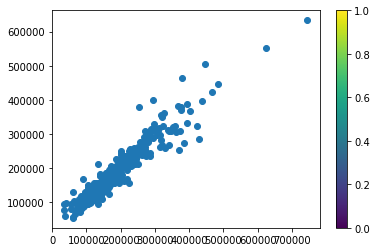

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_test, regressor.predict(X_test))
plt.colorbar()

In [31]:
final_submission = pd.DataFrame()
final_submission['Id'] = test['Id'].astype(int)
predictions = regressor.predict(test_1)
final_submission['SalePrice'] = predictions
final_submission.to_csv('final_submission.csv', index = False)